
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [51]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


In [52]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 50,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 50)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 50)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 50)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

In [53]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：47410


In [54]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 50)                39250     
_________________________________________________________________
activation_21 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_22 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_23 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                2550      
__________

In [55]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''

opt_list = ['Adam','SGD','Rmsprop']


In [56]:

'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
batch_size_list = [196, 392]
epochs = 15

In [57]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


In [58]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [61]:
# 將plot寫成function
import matplotlib.pyplot as plt

%matplotlib inline

def plot_loss_acc(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    # history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

    # Plot training & validation accuracy values
    ax1.plot(history.history['acc'])
    ax1.plot(history.history['val_acc'])
    ax1.set_title(title)
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Test'], loc='upper left')
    # Plot training & validation loss values
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title(title)
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Test'], loc='upper left')
    
    plt.show()

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
 - 1s - loss: 0.0145 - acc: 0.9953 - val_loss: 0.0334 - val_acc: 0.9914
Epoch 2/15
 - 0s - loss: 0.0132 - acc: 0.9956 - val_loss: 0.0316 - val_acc: 0.9912
Epoch 3/15
 - 0s - loss: 0.0120 - acc: 0.9960 - val_loss: 0.0321 - val_acc: 0.9917
Epoch 4/15
 - 0s - loss: 0.0110 - acc: 0.9962 - val_loss: 0.0350 - val_acc: 0.9912
Epoch 5/15
 - 0s - loss: 0.0106 - acc: 0.9964 - val_loss: 0.0318 - val_acc: 0.9917
Epoch 6/15
 - 0s - loss: 0.0103 - acc: 0.9966 - val_loss: 0.0343 - val_acc: 0.9916
Epoch 7/15
 - 0s - loss: 0.0096 - acc: 0.9968 - val_loss: 0.0313 - val_acc: 0.9917
Epoch 8/15
 - 0s - loss: 0.0086 - acc: 0.9972 - val_loss: 0.0345 - val_acc: 0.9918
Epoch 9/15
 - 0s - loss: 0.0089 - acc: 0.9971 - val_loss: 0.0354 - val_acc: 0.9912
Epoch 10/15
 - 0s - loss: 0.0084 - acc: 0.9972 - val_loss: 0.0338 - val_acc: 0.9923
Epoch 11/15
 - 0s - loss: 0.0084 - acc: 0.9972 - val_loss: 0.0376 - val_acc: 0.9910
Epoch 12/15
 - 0s - loss: 0.0079 - 

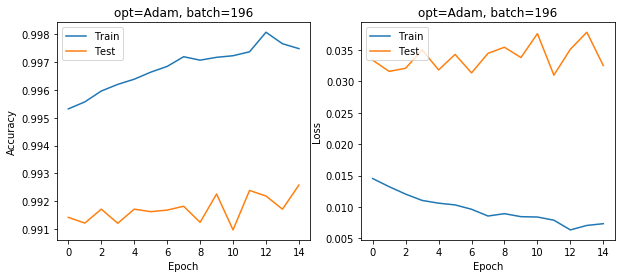

 test set 

 The test loss is %f  [0.03069979068277462, 0.993209992647171]

 The accuracy of the model is 0.965600 
Train on 42000 samples, validate on 18000 samples
Epoch 1/15
 - 1s - loss: 0.0050 - acc: 0.9983 - val_loss: 0.0376 - val_acc: 0.9920
Epoch 2/15
 - 0s - loss: 0.0054 - acc: 0.9983 - val_loss: 0.0355 - val_acc: 0.9928
Epoch 3/15
 - 0s - loss: 0.0033 - acc: 0.9989 - val_loss: 0.0351 - val_acc: 0.9931
Epoch 4/15
 - 0s - loss: 0.0026 - acc: 0.9992 - val_loss: 0.0372 - val_acc: 0.9926
Epoch 5/15
 - 0s - loss: 0.0040 - acc: 0.9986 - val_loss: 0.0440 - val_acc: 0.9918
Epoch 6/15
 - 0s - loss: 0.0044 - acc: 0.9985 - val_loss: 0.0392 - val_acc: 0.9926
Epoch 7/15
 - 0s - loss: 0.0030 - acc: 0.9990 - val_loss: 0.0415 - val_acc: 0.9924
Epoch 8/15
 - 0s - loss: 0.0037 - acc: 0.9988 - val_loss: 0.0398 - val_acc: 0.9924
Epoch 9/15
 - 0s - loss: 0.0034 - acc: 0.9988 - val_loss: 0.0387 - val_acc: 0.9928
Epoch 10/15
 - 0s - loss: 0.0047 - acc: 0.9985 - val_loss: 0.0412 - val_acc: 0.9921
Epo

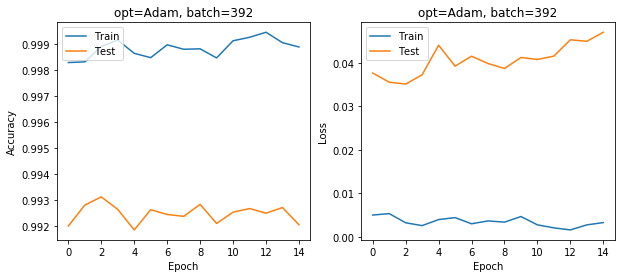

 test set 

 The test loss is %f  [0.041606524908565916, 0.9928399920463562]

 The accuracy of the model is 0.963100 
Train on 42000 samples, validate on 18000 samples
Epoch 1/15
 - 1s - loss: 0.0023 - acc: 0.9992 - val_loss: 0.0418 - val_acc: 0.9929
Epoch 2/15
 - 0s - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0414 - val_acc: 0.9930
Epoch 3/15
 - 1s - loss: 9.6127e-04 - acc: 0.9997 - val_loss: 0.0415 - val_acc: 0.9930
Epoch 4/15
 - 1s - loss: 8.1760e-04 - acc: 0.9998 - val_loss: 0.0415 - val_acc: 0.9931
Epoch 5/15
 - 1s - loss: 7.3404e-04 - acc: 0.9998 - val_loss: 0.0413 - val_acc: 0.9932
Epoch 6/15
 - 1s - loss: 6.7469e-04 - acc: 0.9998 - val_loss: 0.0417 - val_acc: 0.9931
Epoch 7/15
 - 1s - loss: 6.3565e-04 - acc: 0.9999 - val_loss: 0.0417 - val_acc: 0.9931
Epoch 8/15
 - 1s - loss: 6.0220e-04 - acc: 0.9999 - val_loss: 0.0419 - val_acc: 0.9931
Epoch 9/15
 - 1s - loss: 5.7461e-04 - acc: 0.9999 - val_loss: 0.0419 - val_acc: 0.9932
Epoch 10/15
 - 0s - loss: 5.5111e-04 - acc: 0.9999 - val_

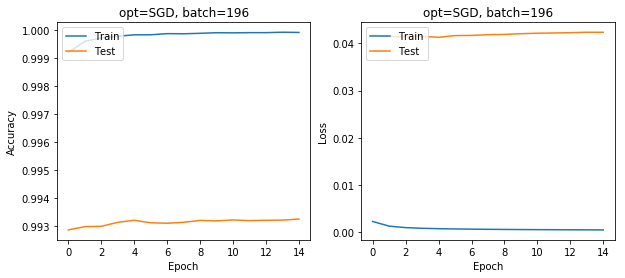

 test set 

 The test loss is %f  [0.03857414335026988, 0.9936399948596955]

 The accuracy of the model is 0.968200 
Train on 42000 samples, validate on 18000 samples
Epoch 1/15
 - 1s - loss: 4.5931e-04 - acc: 0.9999 - val_loss: 0.0424 - val_acc: 0.9933
Epoch 2/15
 - 0s - loss: 4.5419e-04 - acc: 0.9999 - val_loss: 0.0426 - val_acc: 0.9933
Epoch 3/15
 - 0s - loss: 4.4855e-04 - acc: 0.9999 - val_loss: 0.0427 - val_acc: 0.9932
Epoch 4/15
 - 0s - loss: 4.4443e-04 - acc: 0.9999 - val_loss: 0.0426 - val_acc: 0.9932
Epoch 5/15
 - 0s - loss: 4.3951e-04 - acc: 0.9999 - val_loss: 0.0427 - val_acc: 0.9933
Epoch 6/15
 - 0s - loss: 4.3537e-04 - acc: 0.9999 - val_loss: 0.0427 - val_acc: 0.9933
Epoch 7/15
 - 0s - loss: 4.3064e-04 - acc: 0.9999 - val_loss: 0.0427 - val_acc: 0.9933
Epoch 8/15
 - 0s - loss: 4.2706e-04 - acc: 0.9999 - val_loss: 0.0428 - val_acc: 0.9933
Epoch 9/15
 - 0s - loss: 4.2331e-04 - acc: 0.9999 - val_loss: 0.0429 - val_acc: 0.9933
Epoch 10/15
 - 0s - loss: 4.1924e-04 - acc: 0.9999

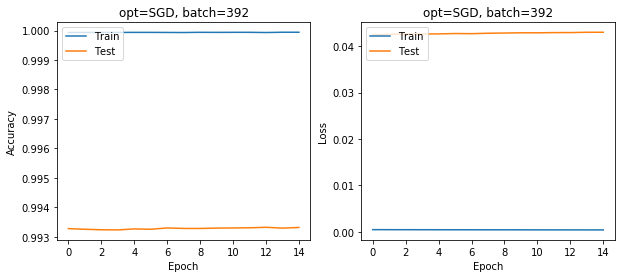

 test set 

 The test loss is %f  [0.039205653482858906, 0.9937099921703338]

 The accuracy of the model is 0.968400 
Train on 42000 samples, validate on 18000 samples
Epoch 1/15
 - 1s - loss: 0.0044 - acc: 0.9986 - val_loss: 0.0486 - val_acc: 0.9928
Epoch 2/15
 - 0s - loss: 0.0037 - acc: 0.9989 - val_loss: 0.0466 - val_acc: 0.9928
Epoch 3/15
 - 0s - loss: 0.0036 - acc: 0.9989 - val_loss: 0.0663 - val_acc: 0.9900
Epoch 4/15
 - 0s - loss: 0.0041 - acc: 0.9988 - val_loss: 0.0556 - val_acc: 0.9918
Epoch 5/15
 - 0s - loss: 0.0039 - acc: 0.9989 - val_loss: 0.0586 - val_acc: 0.9919
Epoch 6/15
 - 0s - loss: 0.0038 - acc: 0.9989 - val_loss: 0.0509 - val_acc: 0.9923
Epoch 7/15
 - 0s - loss: 0.0044 - acc: 0.9988 - val_loss: 0.0543 - val_acc: 0.9921
Epoch 8/15
 - 0s - loss: 0.0039 - acc: 0.9989 - val_loss: 0.0498 - val_acc: 0.9929
Epoch 9/15
 - 0s - loss: 0.0041 - acc: 0.9989 - val_loss: 0.0491 - val_acc: 0.9931
Epoch 10/15
 - 0s - loss: 0.0037 - acc: 0.9989 - val_loss: 0.0523 - val_acc: 0.9930
E

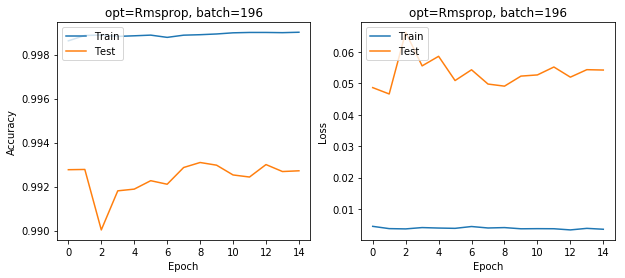

 test set 

 The test loss is %f  [0.05309160667749211, 0.9926399946212768]

 The accuracy of the model is 0.963000 
Train on 42000 samples, validate on 18000 samples
Epoch 1/15
 - 1s - loss: 0.0031 - acc: 0.9992 - val_loss: 0.0528 - val_acc: 0.9931
Epoch 2/15
 - 0s - loss: 0.0021 - acc: 0.9993 - val_loss: 0.0543 - val_acc: 0.9930
Epoch 3/15
 - 0s - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0537 - val_acc: 0.9927
Epoch 4/15
 - 0s - loss: 0.0022 - acc: 0.9994 - val_loss: 0.0580 - val_acc: 0.9931
Epoch 5/15
 - 0s - loss: 0.0017 - acc: 0.9995 - val_loss: 0.0566 - val_acc: 0.9928
Epoch 6/15
 - 0s - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0621 - val_acc: 0.9927
Epoch 7/15
 - 0s - loss: 0.0017 - acc: 0.9995 - val_loss: 0.0574 - val_acc: 0.9928
Epoch 8/15
 - 0s - loss: 0.0017 - acc: 0.9995 - val_loss: 0.0606 - val_acc: 0.9927
Epoch 9/15
 - 0s - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0627 - val_acc: 0.9926
Epoch 10/15
 - 0s - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0580 - val_acc: 0.9929
Ep

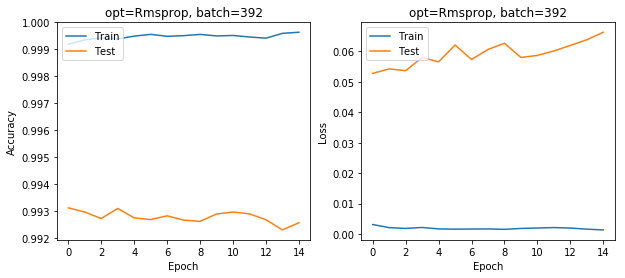

 test set 

 The test loss is %f  [0.05865728993511438, 0.9934799993038177]

 The accuracy of the model is 0.966900 


In [62]:
# Loop, 為了執行不同opt與batch
# 將第三步的編譯與第五步訓練, 修正 model 參數移到這裡
for opt in opt_list:
    for batch_size in batch_size_list:
        model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
        history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
        title = "opt=%s, batch=%d" % (opt,batch_size)
        plot_loss_acc(history, title)
        
        print ( " test set " )
        scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
        print ( "" )
        #print ( " The test loss is %f " % scores)
        print ( " The test loss is %f ", scores)
        result = model.predict(X_test,batch_size=200,verbose= 0)

        result_max = numpy.argmax(result, axis = 1 )
        test_max = numpy.argmax(Y_test, axis = 1 )

        result_bool = numpy.equal(result_max, test_max)
        true_num = numpy.sum(result_bool)
        print ( "" )
        print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))
